In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.pylab as plb

In [14]:
def g_tt(r, theta, M, a):
    return -(1-(2*M*r)/(r**2+(a**2*np.cos(theta)**2)))

def g_tphi(r, theta, M, a):
    return -(2*M*a*r*np.sin(theta)**2)/(r**2+(a**2)*np.cos(theta)**2)

def g_phiphi(r, theta, M, a):
    return (r**2+a**2+(2*M*(a**2)*r*np.sin(theta)**2)/(r**2+(a**2)*np.cos(theta)**2))*(np.sin(theta)**2)

def g_thetatheta(r, theta, M, a):
    return r**2+(a**2)*np.cos(theta)**2

def g_rr(r, theta, M, a):
    return (r**2-2*M*r+a**2)/(r**2+(a**2)*np.cos(theta)**2)

def R_H(M, a):
    return M+np.sqrt(M**2-a**2)

def u_t(gtt, gtphi, gphiphi, l):
    return -np.sqrt(((gtphi**2-gtt*gphiphi)/(gphiphi+2*l*gtphi+gtt*(l**2))))

def W(u_t):
    return np.log(np.absolute(u_t))

def r_mb_f(M, a):
    return 2*M*(1 - (a/M)/2. + np.sqrt(1-(a/M)))

def r_ms_f(M, a):
    z1 = 1+((1-(a/M)**2)**(1/3))*((1+(a/M))**(1/3)+(1-(a/M))**(1/3))
    z2 = (3*((a/M)**2)+z1**2)**(1/2)
    return M*(3+z2-((3-z1)*(3+z1+2*z2))**(1/2))

def Omega_func(gtt, gtphi, gphiphi, l):
    return -((l*gtt+gtphi)/(l*gtphi+gphiphi))

def l_func(gtt, gtphi, gphiphi, Omega):
    return -((Omega*gphiphi+gtphi)/(Omega*gtphi+gtt))

def u_t_con(u_t, Omega, l):
    return (1/u_t)*(-1/(1-Omega*l))

def l_k(r, M, a):
    return ((M**(1/2))*(r**2-2*a*(M**(1/2))*(r**(1/2))+a**2))/(r**(3/2)-2*M*(r**(1/2))+a*(M**(1/2)))

def K_function(W_in, W_c, gamma, rho_c):
    return ((np.exp(W_in-W_c)-1)*((gamma-1)/(gamma*(rho_c**(gamma-1)))))

def rho(W, W_in, gamma, K):
    return ((np.exp(W_in-W)-1)*((gamma-1)/(gamma*K)))**((1)/(gamma-1))

def min_finder(target_array, r_array):
    rev_target_array = np.flip(target_array)
    rev_r_array = np.flip(r_array)
    target_prev = target_array[-1]
    for i in np.arange(len(rev_target_array)):
        target_curr = rev_target_array[i]
        if target_curr > target_prev:
            target_val = target_prev
            target_r = rev_r_array[i-1]
            break
        else:
            target_prev = target_curr
    
    return (target_val, target_r)
        

In [15]:
M = 1
a = 0

nx=251
ntheta=30

x_coord_array = np.linspace(0., 1., nx)
theta_coord_array = np.linspace(0.,np.pi/2, ntheta)
r_H = R_H(M,a)
r_coord_array = np.sqrt(r_H**2+(x_coord_array[1:-1]/(1-x_coord_array[1:-1])**2))
theta_coord_array = theta_coord_array[1:]
r_array = []
theta_array = []
for theta in theta_coord_array:
    r_array.append(r_coord_array)
    theta_array.append(np.ones(nx-2)*theta)
    
r_array = np.asarray(r_array).flatten()
theta_array = np.asarray(theta_array).flatten()
    

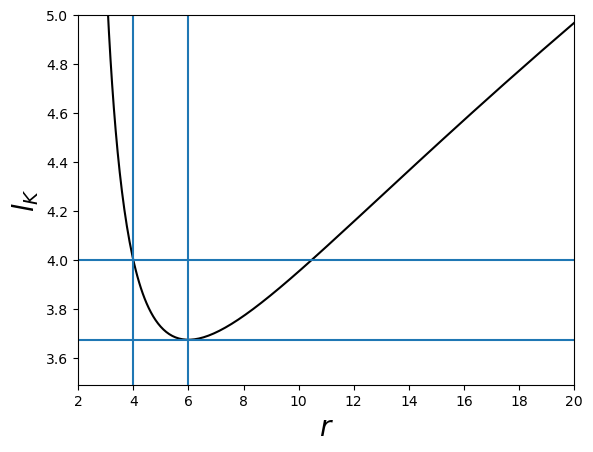

In [18]:
r_ms = r_ms_f(M, a)
r_mb = r_mb_f(M, a)
l_ms = l_k(r_ms, M, a)
l_mb = l_k(r_mb, M, a)

plt.plot(r_coord_array, l_k(r_coord_array, M, a), c='k')
plt.axvline(r_ms)
plt.axvline(r_mb)
plt.axhline(l_ms)
plt.axhline(l_mb)
plb.xlim([r_H,20])
plb.ylim([0.95*l_ms,5])
lx = plt.xlabel("$r$", fontsize=20)
ly = plt.ylabel("$l_K$", fontsize=20)

4.0 4.0
3.674234614174767 6.0


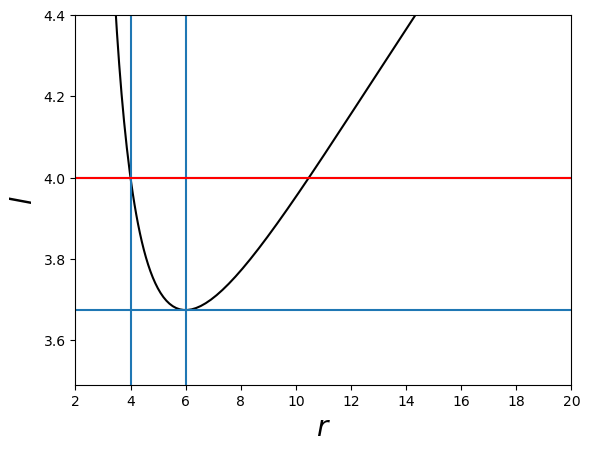

In [51]:
l = l_mb
rho_c = 1.
gamma = 4/3.
print(l_mb, r_mb)
print(l_ms, r_ms)

plt.plot(r_coord_array, l_k(r_coord_array, M, a), c='k')
plt.axvline(r_ms)
plt.axvline(r_mb)
plt.axhline(l_ms)
plt.axhline(l_mb)
plt.axhline(l, c='red')
plb.xlim([r_H,20])
plb.ylim([0.95*l_ms,1.1*l])
lx = plt.xlabel("$r$", fontsize=20)
ly = plt.ylabel("$l$", fontsize=20)

In [52]:
gtt_array = g_tt(r_array, theta_array , M, a)
gtphi_array = g_tphi(r_array, theta_array , M, a)
gphiphi_array = g_phiphi(r_array, theta_array , M, a)
u_t_array = u_t(gtt_array, gtphi_array, gphiphi_array, l)
pot_array = W(u_t_array)

/var/folders/t4/3w52rh197m5006x9z789nqg80000gn/T/ipykernel_30356/401875297.py:20: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(((gtphi**2-gtt*gphiphi)/(gphiphi+2*l*gtphi+gtt*(l**2))))


In [48]:
gtt_eq_array = g_tt(r_coord_array, np.pi/2, M, a)
gtphi_eq_array = g_tphi(r_coord_array, np.pi/2, M, a)
gphiphi_eq_array = g_phiphi(r_coord_array, np.pi/2, M, a)
u_t_eq_array = u_t(gtt_eq_array, gtphi_eq_array, gphiphi_eq_array, l)
pot_eq_array = W(u_t_eq_array)

In [50]:
W_c, r_c = min_finder(pot_eq_array, r_coord_array)
print(W_c, r_c)

plt.plot(r_coord_array, pot_eq_array)
plb.xlim([0,3*r_c])
plb.ylim([1.1*W_c,0.001])
plt.axhline(0, c='k')
lx = plt.xlabel("$r$", fontsize=20)
ly = plt.ylabel("$W_{\\mathrm{eq}}$", fontsize=20)

UnboundLocalError: local variable 'target_val' referenced before assignment

In [40]:
try:
    W_in = W(u_t(g_tt(r_in, np.pi/2, M, a), g_tphi(r_in, np.pi/2,M, a), g_phiphi(r_in, np.pi/2, M, a), l))
except:
    W_in = 0

if (W_in > 0):
    W_in = 0.
    
K = K_function(W_in, W_c, gamma, rho_c)
print(W_in, W_c)

-0.07 -0.13879834656916876


/var/folders/t4/3w52rh197m5006x9z789nqg80000gn/T/ipykernel_27915/401875297.py:49: RuntimeWarning: invalid value encountered in power
  return ((np.exp(W_in-W)-1)*((gamma-1)/(gamma*K)))**((1)/(gamma-1))


[0. 0. 0. ... 0. 0. 0.]


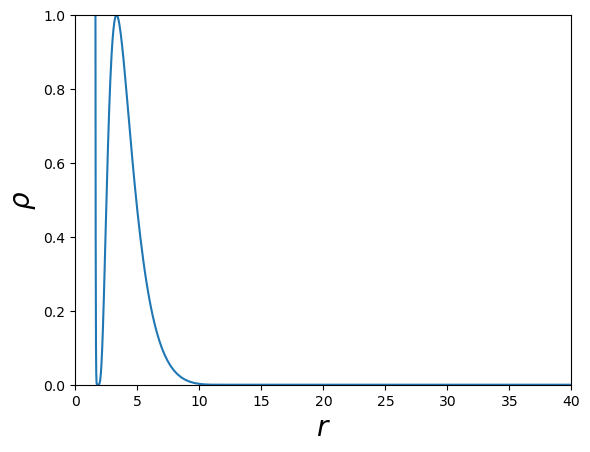

In [41]:
rho_array = rho(pot_array, W_in, gamma, K)
rho_array[np.isnan(rho_array)] = 0
print(rho_array)

rho_eq_array = rho_array[-249:]
plt.plot(r_coord_array, rho_eq_array)
plb.xlim([0,40])
plb.ylim([0,1])
lx = plt.xlabel("$r$", fontsize=20)
ly = plt.ylabel("$\\rho$", fontsize=20)

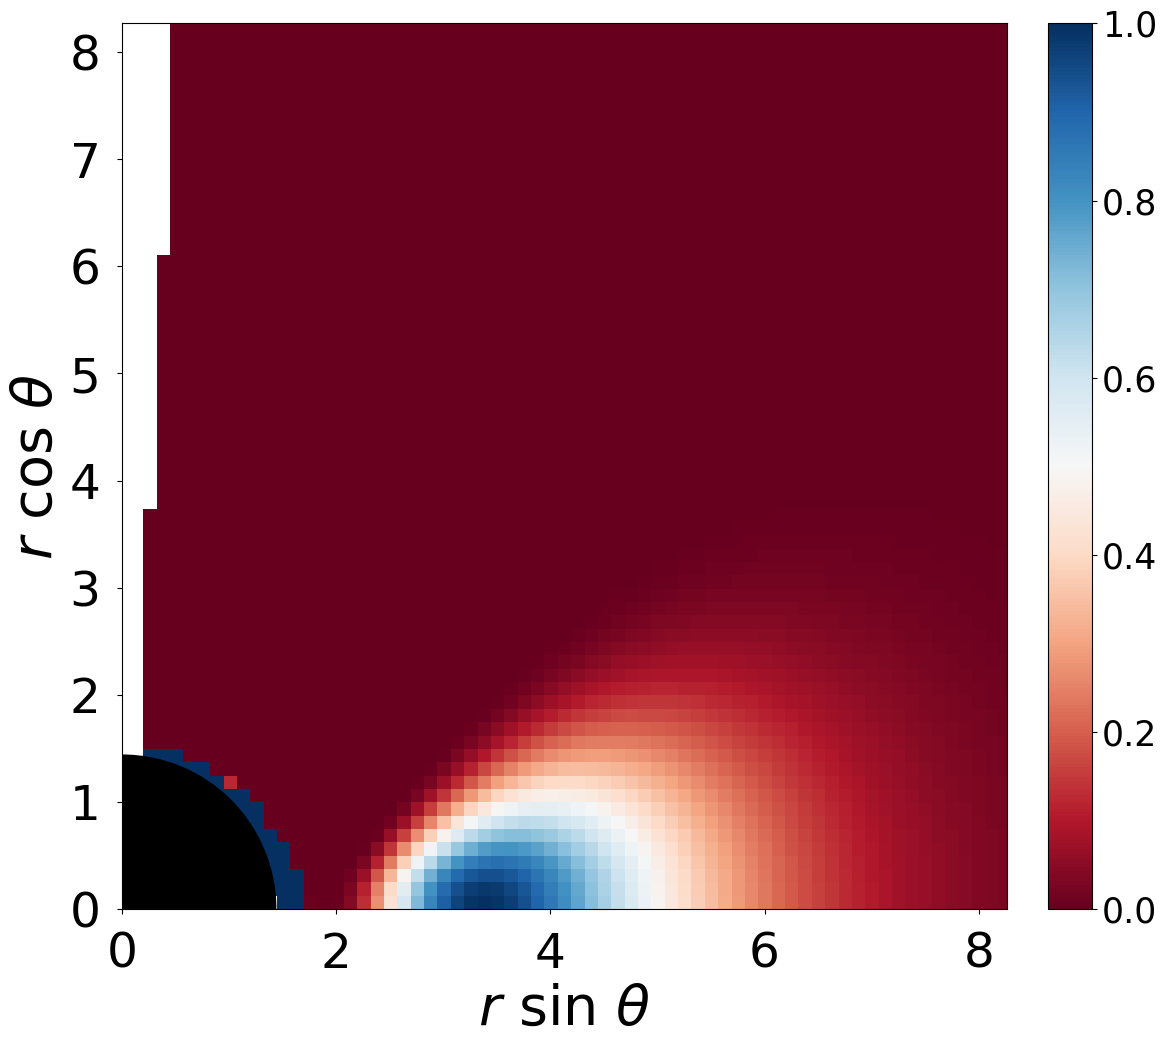

In [42]:
xArray = r_array*np.sin(theta_array)
yArray = r_array*np.cos(theta_array)

r_center = r_c
x_max = r_center * 2.5
y_max = x_max

heightArray = rho_array

numIndexes = 2000
xi = np.linspace(np.min(xArray), np.max(xArray),numIndexes)
yi = np.linspace(np.min(yArray), np.max(yArray),numIndexes)

xi, yi = np.mgrid[np.min(xArray):np.max(xArray):2000j, np.min(yArray):np.max(yArray):2000j]

DEM = griddata((xArray, yArray), heightArray, (xi, yi), method="cubic")

z_min = 0
z_max = 1

xi = np.linspace(np.min(xArray), np.max(xArray),numIndexes)
yi = np.linspace(np.min(yArray), np.max(yArray),numIndexes)

plt.figure(figsize=(13,11.5))
plt.imshow(DEM.transpose(), cmap='RdBu', vmin=0, vmax=1,
        extent=[np.min(xArray), np.max(xArray), np.min(yArray), np.max(yArray)],
        interpolation='nearest', origin='lower')
cb = plt.colorbar(fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize = 25)

plb.ylim([0,x_max])
plb.xlim([0,x_max])
plt.tick_params(labelsize=35, pad = 12)
circle = plt.Circle((0., 0.), r_H, color='black')
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle)
lx = plt.xlabel("$r$ sin $\\theta$", fontsize=40)
ly = plt.ylabel("$r$ cos $\\theta$", fontsize=40)
# plt.savefig(output_filename, dpi=900)
